# Tutorial 1 - Data Pipelining

## Open Dataset : MURA Dataset (Ver 1.0)

- MUsculoskeletal RAdiographs (Bone X-rays)         
- https://stanfordmlgroup.github.io/competitions/mura/
- https://arxiv.org/abs/1712.06957

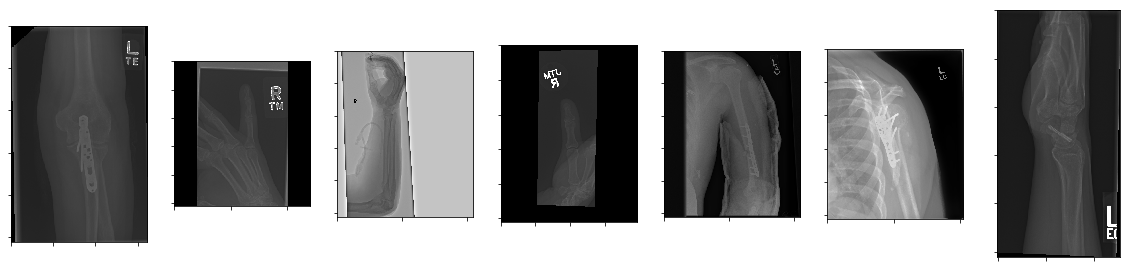

In [1]:
from __future__ import absolute_import, division, print_function
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline


images = []
for img_path in glob.glob('../assets/samples/*.png'):
    rgb = cv2.imread(img_path)
    images.append(rgb)

plt.figure(figsize=(20,10))
columns = 7

for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)
    
    frame = plt.gca()
    frame.axes.xaxis.set_ticklabels([])
    frame.axes.yaxis.set_ticklabels([])
    
plt.show()    

[]

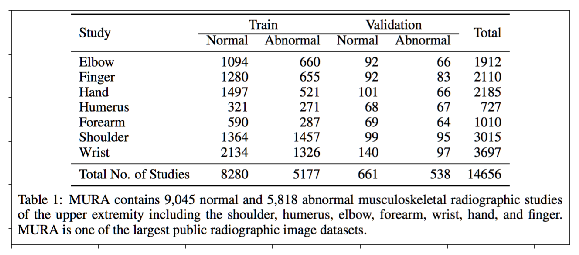

In [2]:
mura_datasets = cv2.imread('../assets/MURA_datasets.png')
plt.figure(figsize=(10,5))
plt.imshow(mura_datasets)

frame = plt.gca()
frame.axes.xaxis.set_ticklabels([])
frame.axes.yaxis.set_ticklabels([])

|(7cls)| Train|  Val | Test |
|------|------|------|------|
|Elbow|1,736|154|30|
|Finger|1,867|166|30|
|Forearm|877|133|30|
|Hand|1,945|159|30|
|Humerus|606|133|30|
|Shoulder|2,719|174|30|
|Writst|3,285|207|29|

## Contents

1. Load Dataset
2. Dataset Preparation
3. Image Resizing
4. Save (.h) (Optional) 
5. Dataset Splitting 
6. Save (.h) -> 5등분

## Load Dataset

- Negative : 0 / Positive : 1

- folder -> Image, Label
- .csv -> Image, Label, Patient number (v)

In [5]:
import pandas as pd

path = '../Dataset/MURA-v1.0/'
train_file = pd.read_csv(path + 'train.csv', names = ['Image', 'Label'])
print(np.shape(train_file))


train_file.head()

(37111, 2)


,Image,Label
0,MURA-v1.0/train/XR_SHOULDER/patient00001/study...,1
1,MURA-v1.0/train/XR_SHOULDER/patient00001/study...,1
2,MURA-v1.0/train/XR_SHOULDER/patient00001/study...,1
3,MURA-v1.0/train/XR_SHOULDER/patient00002/study...,1
4,MURA-v1.0/train/XR_SHOULDER/patient00002/study...,1


## Dataset Preparation
- Task 1 - 해부학적 종류 (cls = 7)
- Task 2 - 양성/악성 (cls = 2)

### (1) Task 1 - 해부학적 종류 (cls = 7)

In [6]:
""" Check """
train_file_pre = train_file.copy()
ex_img_kind = train_file_pre["Image"][0][16:-40] # fixed name
print(ex_img_kind)


print("Total Numer: " + str(len(train_file_pre)))

XR_SHOULDER
Total Numer: 37111


' Check '

In [7]:
elbow_list = []
finger_list = []
forearm_list = []
hand_list = []
humerus_list = []
shoulder_list = []
wrist_list = []
else_list = []

elbow_pID_list = []
finger_pID_list = []
forearm_pID_list = []
hand_pID_list = []
humerus_pID_list = []
shoulder_pID_list = []
wrist_pID_list = []

for i in range(len(train_file_pre)):
    if train_file_pre["Image"][i][16:-40] == "XR_ELBOW":
        elbow_list.append(i)
        ### ID ###
        elbow_pID_list.append(train_file_pre["Image"][i][-32:-27]) 
    elif train_file_pre["Image"][i][16:-40] == "XR_FINGER":
        finger_list.append(i)
        finger_pID_list.append(train_file_pre["Image"][i][-32:-27]) 
    elif train_file_pre["Image"][i][16:-40] == "XR_FOREARM":
        forearm_list.append(i)
        forearm_pID_list.append(train_file_pre["Image"][i][-32:-27]) 
    elif train_file_pre["Image"][i][16:-40] == "XR_HAND":
        hand_list.append(i)
        hand_pID_list.append(train_file_pre["Image"][i][-32:-27]) 
    elif train_file_pre["Image"][i][16:-40] == "XR_HUMERUS": 
        humerus_list.append(i)
        humerus_pID_list.append(train_file_pre["Image"][i][-32:-27]) 

        pass ## Fill in!
        
    elif train_file_pre["Image"][i][16:-40] == "XR_SHOULDER": 
        shoulder_list.append(i)     
        shoulder_pID_list.append(train_file_pre["Image"][i][-32:-27])
        
        pass ## Fill in!
    
    elif train_file_pre["Image"][i][16:-40] == "XR_WRIST":
        wrist_list.append(i) 
        wrist_pID_list.append(train_file_pre["Image"][i][-33:-28])
    else:
        else_list.append(i)
        
        
""" Error Check """ 
print("Total: " + str(len(train_file_pre)))
print("Elbow: " + str(len(elbow_list)))
print("Finger: " + str(len(finger_list)))
print("Forearm: " + str(len(forearm_list)))
print("Hand: " + str(len(hand_list)))
print("Humerus: " + str(len(humerus_list)))
print("Shoulder: " + str(len(shoulder_list)))
print("Wrist: " + str(len(wrist_list)))
print("Else: " + str(len(else_list)))

print(len(elbow_list) + len(finger_list) + len(forearm_list) + len(hand_list) + len(humerus_list) + len(shoulder_list) + len(wrist_list) + len(else_list))

Total: 37111
Elbow: 5009
Finger: 5111
Forearm: 1856
Hand: 5543
Humerus: 1331
Shoulder: 8451
Wrist: 9803
Else: 7
37111


In [ ]:
""" Check """
# print(len(train_file_pre["Image"][0]))
# print(train_file_pre["Image"][9491][16:-40]) # 3296, 3297, 3298, 3299, 6892, 6893, 9491
# print(len(train_file_pre["Image"][9491]))

## Image Resizing

In [63]:
def resizing(img, image_size, option):
    height = img.shape[0]
    width = img.shape[1]

    height_ratio = image_size/height
    width_ratio = image_size/width

    min_ratio = np.minimum(height_ratio, width_ratio)
    max_rc_ratio = np.maximum(int(width*min_ratio), int(height*min_ratio))
    
    if max_rc_ratio == image_size:
        resized_image = cv2.resize(img, (int(width*min_ratio), int(height*min_ratio)),interpolation=cv2.INTER_CUBIC)
    else:
        resized_image = cv2.resize(img, (int(width*min_ratio)+1, int(height*min_ratio)+1),interpolation=cv2.INTER_CUBIC)

    """ Options: (1)Resizing (2)Zero-padding (3) Random-noise-padding """    
    if option == "resize":
        resized_image = cv2.resize(img, (image_size, image_size), interpolation=cv2.INTER_CUBIC)
        return resized_image
    elif option == "zero":
        rand_noisy = np.zeros((image_size, image_size, 3), dtype=np.uint8)
    elif option == "noise":
        rand_noisy = np.random.randint(0, 255, size=(image_size, image_size, 3), dtype=np.uint8)

    max_rc = np.maximum(height, width)
    if (max_rc == height) and (height != width):
        padding_img = rand_noisy[0:, 0:int((image_size - (width * min_ratio)) // 2), 0:]
        padding_img2 = np.append(padding_img, resized_image, axis=1)
        padding_result = np.append(padding_img2, rand_noisy[0:, 0:(image_size - padding_img2.shape[1]), 0:], axis=1)
        return padding_result

    elif (max_rc == width) and (height != width):
        padding_img = rand_noisy[0:int((image_size - (height * min_ratio)) // 2), 0:, 0:]
        padding_img2 = np.append(padding_img, resized_image, axis=0)
        padding_result = np.append(padding_img2, rand_noisy[0:(image_size - padding_img2.shape[0]), 0:, 0:], axis=0)
        return padding_result

    elif height == width:
        resized_image = cv2.resize(img, (image_size, image_size),interpolation=cv2.INTER_CUBIC)
        return resized_image

In [64]:
def load_image_label(csv_file, list_file, img_size, option):
    reimg_list = []
    relabel_list = []
    for i in list_file:
        ### Image ###
        file = csv_file["Image"][i]
        img = cv2.imread('../Dataset/' + file)
        
        """ Resizing """
        if option == "resize":
            reimg = resizing(img, img_size, "resize") 
        elif option == "zero":
            reimg = resizing(img, img_size, "zero")
        elif option == "noise":
            reimg = resizing(img, img_size, "noise")
        reimg_list.append(reimg)     

        ### Label ###
        label = csv_file["Label"][i]
        relabel_list.append(label)   
        
    return reimg_list, relabel_list

In [67]:
### 224 x 224 : DenseNet, ResNet50
### 299 x 229 : Xeption, InceptionV3, InceptionResNetV2
img_size = 299

elbow_img_list, elbow_label_list = load_image_label(train_file_pre, elbow_list, img_size, "zero")
finger_img_list, finger_label_list = load_image_label(train_file_pre, finger_list, img_size, 'zero')
forearm_img_list, forearm_label_list = load_image_label(train_file_pre, forearm_list, img_size, 'noise')
hand_img_list, hand_label_list = load_image_label(train_file_pre, hand_list, img_size, 'noise')
humerus_img_list, humerus_label_list = load_image_label(train_file_pre, humerus_list, img_size, 'resize')
shoulder_img_list, shoulder_label_list = load_image_label(train_file_pre, shoulder_list, img_size, 'resize')
wrist_img_list, wrist_label_list = load_image_label(train_file_pre, wrist_list, img_size, 'resize')

print('***** Preprocessing Done ******')

***** Preprocessing Done ******


In [3]:
""" Image Check """   
num = 0
resized_images = [elbow_img_list[num], finger_img_list[num], forearm_img_list[num], 
                  hand_img_list[num], humerus_img_list[num], shoulder_img_list[num], wrist_img_list[num]]

plt.figure(figsize=(20,20))
columns = 7
for i, image in enumerate(resized_images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)
    
    frame = plt.gca()
    frame.axes.xaxis.set_ticklabels([])
    frame.axes.yaxis.set_ticklabels([])

NameError: name 'elbow_img_list' is not defined

### Task - 양성/악성 (cls = 2)

In [16]:
import keras

def class_splitting(csv_file, img_list, label_list, id_list, num_classes):
    imgs0 = []
    imgs1 = []
    label0 = []
    label1 = []
    id0 = []
    id1 = []
    for i in range(len(img_list)):
        if label_list[i] == 0:
            imgs0.append(img_list[i])
            label0.append(label_list[i])
            id0.append(id_list[i])
        elif label_list[i] == 1:
            imgs1.append(img_list[i])
            label1.append(label_list[i])
            id1.append(id_list[i])
            
    """ One-hot Encodding """        
    labels0 = keras.utils.to_categorical(label0, num_classes) 
    labels1 = keras.utils.to_categorical(label1, num_classes)   
    
    id0 = np.asmatrix(pd.DataFrame(id0))
    id1 = np.asmatrix(pd.DataFrame(id1))
    
    return imgs0, imgs1, labels0, labels1, id0, id1

/Users/dhlee/anaconda/envs/tensorflow3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [17]:
num_class = 2

elbow_img0, elbow_img1, elbow_label0, elbow_label1, elbow_id0, elbow_id1 = \
class_splitting(train_file_pre, elbow_img_list, elbow_label_list, elbow_pID_list, num_class)

finger_img0, finger_img1, finger_label0, finger_label1, finger_id0, finger_id1 = \
class_splitting(train_file_pre, finger_img_list, finger_label_list, finger_pID_list, num_class)

forearm_img0, forearm_img1, forearm_label0, forearm_label1, forearm_id0, forearm_id1 = \
class_splitting(train_file_pre, forearm_img_list, forearm_label_list, forearm_pID_list, num_class)

pass ## Fill in! 

humerus_img0, humerus_img1, humerus_label0, humerus_label1, humerus_id0, humerus_id1 = \
class_splitting(train_file_pre, humerus_img_list, humerus_label_list, humerus_pID_list, num_class)

shoulder_img0, shoulder_img1, shoulder_label0, shoulder_label1, shoulder_id0, shoulder_id1 = \
class_splitting(train_file_pre, shoulder_img_list, shoulder_label_list, shoulder_pID_list, num_class)

wrist_img0, wrist_img1, wrist_label0, wrist_label1, wrist_id0, wrist_id1 = \
class_splitting(train_file_pre, wrist_img_list, wrist_label_list, wrist_pID_list, num_class)


## Save .h (optional)

- h5py : 대용량 데이터에 적합하고 빠른 입출력

In [26]:
import h5py

save_path = path

""" Image & Label """
with h5py.File(save_path + 'h5py/' + 'Elbow.h5', 'w') as hf:
    hf.create_dataset('Elbow_img0', data=elbow_img0, compression='lzf')
    hf.create_dataset('Elbow_img1', data=elbow_img1, compression='lzf')
    hf.create_dataset('Elbow_label0', data=elbow_label0, compression='lzf')
    hf.create_dataset('Elbow_label1', data=elbow_label1, compression='lzf')
    
with h5py.File(save_path + 'h5py/' + 'Finger.h5', 'w') as hf:
    hf.create_dataset('Finger_img0', data=finger_img0, compression='lzf')
    hf.create_dataset('Finger_img1', data=finger_img1, compression='lzf')
    hf.create_dataset('Finger_label0', data=finger_label0, compression='lzf')
    hf.create_dataset('Finger_label1', data=finger_label1, compression='lzf')

with h5py.File(save_path + 'h5py/' + 'Forearm.h5', 'w') as hf:
    hf.create_dataset('Forearm_img0', data=forearm_img0, compression='lzf')
    hf.create_dataset('Forearm_img1', data=forearm_img1, compression='lzf')
    hf.create_dataset('Forearm_label0', data=forearm_label0, compression='lzf')
    hf.create_dataset('Forearm_label1', data=forearm_label1, compression='lzf')    
    
with h5py.File(save_path + 'h5py/' + 'Hand.h5', 'w') as hf:
    hf.create_dataset('Hand_img0', data=hand_img0, compression='lzf')
    hf.create_dataset('Hand_img1', data=hand_img1, compression='lzf')
    hf.create_dataset('Hand_label0', data=hand_label0, compression='lzf')
    hf.create_dataset('Hand_label1', data=hand_label1, compression='lzf')  

with h5py.File(save_path + 'h5py/' + 'Humerus.h5', 'w') as hf:
    hf.create_dataset('Humerus_img0', data=humerus_img0, compression='lzf')
    hf.create_dataset('Humerus_img1', data=humerus_img1, compression='lzf')
    hf.create_dataset('Humerus_label0', data=humerus_label0, compression='lzf')
    hf.create_dataset('Humerus_label1', data=humerus_label1, compression='lzf')      
    
with h5py.File(save_path + 'h5py/' + 'Shoulder.h5', 'w') as hf:
    hf.create_dataset('Shoulder_img0', data=shoulder_img0, compression='lzf')
    hf.create_dataset('Shoulder_img1', data=shoulder_img1, compression='lzf')
    hf.create_dataset('Shoulder_label0', data=shoulder_label0, compression='lzf')
    hf.create_dataset('Shoulder_label1', data=shoulder_label1, compression='lzf')     

with h5py.File(save_path + 'h5py/' + 'Wrist.h5', 'w') as hf:
    hf.create_dataset('Wrist_img0', data=wrist_img0, compression='lzf')
    hf.create_dataset('Wrist_img1', data=wrist_img1, compression='lzf')
    hf.create_dataset('Wrist_label0', data=wrist_label0, compression='lzf')
    hf.create_dataset('Wrist_label1', data=wrist_label1, compression='lzf') 
    
    
""" Patient ID """    
np.save(save_path + 'h5py/' + 'Elbow_ID0.npy', elbow_id0)
np.save(save_path + 'h5py/' + 'Elbow_ID1.npy', elbow_id1)
np.save(save_path + 'h5py/' + 'Finger_ID0.npy', finger_id0)
np.save(save_path + 'h5py/' + 'Finger_ID1.npy', finger_id1)
np.save(save_path + 'h5py/' + 'Forearm_ID0.npy', forearm_id0)
np.save(save_path + 'h5py/' + 'Forearm_ID1.npy', forearm_id1)
np.save(save_path + 'h5py/' + 'Hand_ID0.npy', hand_id0)
np.save(save_path + 'h5py/' + 'Hand_ID1.npy', hand_id1)
np.save(save_path + 'h5py/' + 'Humerus_ID0.npy', humerus_id0)
np.save(save_path + 'h5py/' + 'Humerus_ID1.npy', humerus_id1)
np.save(save_path + 'h5py/' + 'Shoulder_ID0.npy', shoulder_id0)
np.save(save_path + 'h5py/' + 'Shoulder_ID1.npy', shoulder_id1)
np.save(save_path + 'h5py/' + 'Wrist_ID0.npy', wrist_id0)
np.save(save_path + 'h5py/' + 'Wrist_ID1.npy', wrist_id1)

print('Saving .h5 files done.')

Saving .h5 files done.


## Dataset Splitting

e.g. (X_train, y_train), (X_test, y_test) = mnist.load_data()

- Load .h5 files

In [28]:
Elbow = h5py.File(save_path + 'h5py/' + 'Elbow.h5', 'r')
elbow_img0 = Elbow['Elbow_img0']
elbow_img1 = Elbow['Elbow_img1']
elbow_label0 = Elbow['Elbow_label0']
elbow_label1 = Elbow['Elbow_label1']
eblow_id0 = np.load(save_path + 'h5py/' + 'Elbow_ID0.npy')
eblow_id1 = np.load(save_path + 'h5py/' + 'Elbow_ID1.npy')

print("Elbow")
print(np.shape(elbow_img0))
print(np.shape(elbow_img1))
print(np.shape(elbow_label0))
print(np.shape(elbow_label1))
print(np.shape(eblow_id0))
print(np.shape(eblow_id1))

Finger = h5py.File(save_path + 'h5py/' + 'Finger.h5', 'r')
finger_img0 = Finger['Finger_img0']
finger_img1 = Finger['Finger_img1']
finger_label0 = Finger['Finger_label0']
finger_label1 = Finger['Finger_label1']
finger_id0 = np.load(save_path + 'h5py/' + 'Finger_ID0.npy')
finger_id1 = np.load(save_path + 'h5py/' + 'Finger_ID1.npy')

print("Finger")
print(np.shape(finger_img0))
print(np.shape(finger_img1))
print(np.shape(finger_label0))
print(np.shape(finger_label1))
print(np.shape(finger_id0))
print(np.shape(finger_id1))

Forearm = h5py.File(save_path + 'h5py/' + 'Forearm.h5', 'r')
forearm_img0 = Forearm['Forearm_img0']
forearm_img1 = Forearm['Forearm_img1']
forearm_label0 = Forearm['Forearm_label0']
forearm_label1 = Forearm['Forearm_label1']
forearm_id0 = np.load(save_path + 'h5py/' + 'Forearm_ID0.npy')
forearm_id1 = np.load(save_path + 'h5py/' + 'Forearm_ID1.npy')

print("Forearm")
print(np.shape(forearm_img0))
print(np.shape(forearm_img1))
print(np.shape(forearm_label0))
print(np.shape(forearm_label1))
print(np.shape(forearm_id0))
print(np.shape(forearm_id1))

Hand = h5py.File(save_path + 'h5py/' + 'Hand.h5', 'r')
hand_img0 = Hand['Hand_img0']
hand_img1 = Hand['Hand_img1']
hand_label0 = Hand['Hand_label0']
hand_label1 = Hand['Hand_label1']
hand_id0 = np.load(save_path + 'h5py/' + 'Hand_ID0.npy')
hand_id1 = np.load(save_path + 'h5py/' + 'Hand_ID1.npy')

print("Hand")
print(np.shape(hand_img0))
print(np.shape(hand_img1))
print(np.shape(hand_label0))
print(np.shape(hand_label1))
print(np.shape(hand_id0))
print(np.shape(hand_id1))

Humerus = h5py.File(save_path + 'h5py/' + 'Humerus.h5', 'r')
humerus_img0 = Humerus['Humerus_img0']
humerus_img1 = Humerus['Humerus_img1']
humerus_label0 = Humerus['Humerus_label0']
humerus_label1 = Humerus['Humerus_label1']
humerus_id0 = np.load(save_path + 'h5py/' + 'Humerus_ID0.npy')
humerus_id1 = np.load(save_path + 'h5py/' + 'Humerus_ID1.npy')

print("Humerus")
print(np.shape(humerus_img0))
print(np.shape(humerus_img1))
print(np.shape(humerus_label0))
print(np.shape(humerus_label1))
print(np.shape(humerus_id0))
print(np.shape(humerus_id1))

Shoulder = h5py.File(save_path + 'h5py/' + 'Shoulder.h5', 'r')
shoulder_img0 = Shoulder['Shoulder_img0']
shoulder_img1 = Shoulder['Shoulder_img1']
shoulder_label0 = Shoulder['Shoulder_label0']
shoulder_label1 = Shoulder['Shoulder_label1']
shoulder_id0 = np.load(save_path + 'h5py/' + 'Shoulder_ID0.npy')
shoulder_id1 = np.load(save_path + 'h5py/' + 'Shoulder_ID1.npy')

print("Shoulder")
print(np.shape(shoulder_img0))
print(np.shape(shoulder_img1))
print(np.shape(shoulder_label0))
print(np.shape(shoulder_label1))
print(np.shape(shoulder_id0))
print(np.shape(shoulder_id1))

Wrist = h5py.File(save_path + 'h5py/' + 'Wrist.h5', 'r')
wrist_img0 = Wrist['Wrist_img0']
wrist_img1 = Wrist['Wrist_img1']
wrist_label0 = Wrist['Wrist_label0']
wrist_label1 = Wrist['Wrist_label1']
wrist_id0 = np.load(save_path + 'h5py/' + 'Wrist_ID0.npy')
wrist_id1 = np.load(save_path + 'h5py/' + 'Wrist_ID1.npy')

print("Wrist")
print(np.shape(wrist_img0))
print(np.shape(wrist_img1))
print(np.shape(wrist_label0))
print(np.shape(wrist_label1))
print(np.shape(wrist_id0))
print(np.shape(wrist_id1))

Elbow
(2930, 299, 299, 3)
(2079, 299, 299, 3)
(2930, 2)
(2079, 2)
(2930, 1)
(2079, 1)
Finger
(3143, 299, 299, 3)
(1968, 299, 299, 3)
(3143, 2)
(1968, 2)
(3143, 1)
(1968, 1)
Forearm
(1166, 299, 299, 3)
(690, 299, 299, 3)
(1166, 2)
(690, 2)
(1166, 1)
(690, 1)
Hand
(4059, 299, 299, 3)
(1484, 299, 299, 3)
(4059, 2)
(1484, 2)
(4059, 1)
(1484, 1)
Humerus
(701, 299, 299, 3)
(631, 299, 299, 3)
(701, 2)
(631, 2)
(701, 1)
(631, 1)
Shoulder
(4213, 299, 299, 3)
(4244, 299, 299, 3)
(4213, 2)
(4244, 2)
(4213, 1)
(4244, 1)
Wrist
(5781, 299, 299, 3)
(4022, 299, 299, 3)
(5781, 2)
(4022, 2)
(5781, 1)
(4022, 1)


- Concatenation Practice (양성/음성)

In [29]:
elbow_imgs = np.concatenate((elbow_img0, elbow_img1), axis=0)
elbow_labels = np.concatenate((elbow_label0, elbow_label1), axis=0)
elbow_ids = np.concatenate((elbow_id0, elbow_id1), axis=0)

print("Elbow")
print(np.shape(elbow_imgs))
print(np.shape(elbow_labels))
print(np.shape(elbow_ids))

finger_imgs = np.concatenate((finger_img0, finger_img1), axis=0)
finger_labels = np.concatenate((finger_label0, finger_label1), axis=0)
finger_ids = np.concatenate((finger_id0, finger_id1), axis=0)

print("Finger")
print(np.shape(finger_imgs))
print(np.shape(finger_labels))
print(np.shape(finger_ids))


pass ## Fill in! 


print("Forearm")
print(np.shape(forearm_imgs))
print(np.shape(forearm_labels))
print(np.shape(forearm_ids))

hand_imgs = np.concatenate((hand_img0, hand_img1), axis=0)
hand_labels = np.concatenate((hand_label0, hand_label1), axis=0)
hand_ids = np.concatenate((hand_id0, hand_id1), axis=0)

print("Hand")
print(np.shape(hand_imgs))
print(np.shape(hand_labels))
print(np.shape(hand_ids))

pass ## Fill in! 

print("Humerus")
print(np.shape(humerus_imgs))
print(np.shape(humerus_labels))
print(np.shape(humerus_ids))

shoulder_imgs = np.concatenate((shoulder_img0, shoulder_img1), axis=0)
shoulder_labels = np.concatenate((shoulder_label0, shoulder_label1), axis=0)
shoulder_ids = np.concatenate((shoulder_id0, shoulder_id1), axis=0)

print("Shoulder")
print(np.shape(shoulder_imgs))
print(np.shape(shoulder_labels))
print(np.shape(shoulder_ids))

wrist_imgs = np.concatenate((wrist_img0, wrist_img1), axis=0)
wrist_labels = np.concatenate((wrist_label0, wrist_label1), axis=0)
wrist_ids = np.concatenate((wrist_id0, wrist_id1), axis=0)

print("Wrist")
print(np.shape(wrist_imgs))
print(np.shape(wrist_labels))
print(np.shape(wrist_ids))

Elbow
(5009, 299, 299, 3)
(5009, 2)
(5009, 1)
Finger
(5111, 299, 299, 3)
(5111, 2)
(5111, 1)
Forearm
(1856, 299, 299, 3)
(1856, 2)
(1856, 1)
Hand
(5543, 299, 299, 3)
(5543, 2)
(5543, 1)
Humerus
(1332, 299, 299, 3)
(1332, 2)
(1332, 1)
Shoulder
(8457, 299, 299, 3)
(8457, 2)
(8457, 1)
Wrist
(9803, 299, 299, 3)
(9803, 2)
(9803, 1)


- Elbow : 5009
- Finger : 5111
- Forearm : 1856
- Hand : 5543
- Humerus : 1332
- Shoulder : 8457 
- Wrist : 9803

- Shuffling (Optional)

In [30]:
np.random.seed(0)
np.random.shuffle(elbow_imgs)
np.random.seed(0)
np.random.shuffle(elbow_labels)
np.random.seed(0)
np.random.shuffle(elbow_ids)

np.random.seed(0)
np.random.shuffle(finger_imgs)
np.random.seed(0)
np.random.shuffle(finger_labels)
np.random.seed(0)
np.random.shuffle(finger_ids)

np.random.seed(0)
np.random.shuffle(forearm_imgs)
np.random.seed(0)
np.random.shuffle(forearm_labels)
np.random.seed(0)
np.random.shuffle(forearm_ids)

np.random.seed(0)
np.random.shuffle(hand_imgs)
np.random.seed(0)
np.random.shuffle(hand_labels)
np.random.seed(0)
np.random.shuffle(hand_ids)

np.random.seed(0)
np.random.shuffle(humerus_imgs)
np.random.seed(0)
np.random.shuffle(humerus_labels)
np.random.seed(0)
np.random.shuffle(humerus_ids)

np.random.seed(0)
np.random.shuffle(shoulder_imgs)
np.random.seed(0)
np.random.shuffle(shoulder_labels)
np.random.seed(0)
np.random.shuffle(shoulder_ids)

np.random.seed(0)
np.random.shuffle(wrist_imgs)
np.random.seed(0)
np.random.shuffle(wrist_labels)
np.random.seed(0)
np.random.shuffle(wrist_ids)

- Train : Val = 4 : 1 (Cross-Validation : 5-folds) 

In [31]:
train_r, val_r = 0.8, 0.2

elbow_val = int(np.ceil(val_r * len(elbow_imgs)))
elbow_train = len(elbow_imgs) - elbow_val

finger_val = int(np.ceil(val_r * len(finger_imgs)))
finger_train = len(finger_imgs) - finger_val

forearm_val = int(np.ceil(val_r * len(forearm_imgs)))
forearm_train = len(forearm_imgs) - forearm_val

hand_val = int(np.ceil(val_r * len(hand_imgs)))
hand_train = len(hand_imgs) - hand_val

humerus_val = int(np.ceil(val_r * len(humerus_imgs)))
humerus_train = len(humerus_imgs) - humerus_val

shoulder_val = int(np.ceil(val_r * len(shoulder_imgs)))
shoulder_train = len(shoulder_imgs) - shoulder_val

wrist_val = int(np.ceil(val_r * len(wrist_imgs)))
wrist_train = len(wrist_imgs) - wrist_val

print("Elbow: " + str(len(elbow_imgs)), " Train: " + str(elbow_train)," Val: " + str(elbow_val))
print("Finger: " + str(len(finger_imgs)), " Train: " + str(finger_train)," Val: " + str(finger_val))
print("Forearm: " + str(len(forearm_imgs)), " Train: " + str(forearm_train)," Val: " + str(forearm_val))
print("Hand: " + str(len(hand_imgs)), " Train: " + str(hand_train)," Val: " + str(hand_val))
print("Humerus: " + str(len(humerus_imgs)), " Train: " + str(humerus_train)," Val: " + str(humerus_val))
print("Shoulder: " + str(len(shoulder_imgs)), " Train: " + str(shoulder_train)," Val: " + str(shoulder_val))
print("Wrist: " + str(len(wrist_imgs)), " Train: " + str(wrist_train)," Val: " + str(wrist_val))

Elbow: 5009  Train: 4007  Val: 1002
Finger: 5111  Train: 4088  Val: 1023
Forearm: 1856  Train: 1484  Val: 372
Hand: 5543  Train: 4434  Val: 1109
Humerus: 1332  Train: 1065  Val: 267
Shoulder: 8457  Train: 6765  Val: 1692
Wrist: 9803  Train: 7842  Val: 1961


In [32]:
def batch_splitting(_image, _label, _id, val_num):
    """ Image """
    batch_img1 = _image[:val_num]
    batch_img2 = _image[val_num:val_num*2]
    batch_img3 = _image[val_num*2:val_num*3]
    batch_img4 = _image[val_num*3:val_num*4]
    batch_img5 = _image[val_num*4:]    
    
    """ Label """
    batch_label1 = _label[:val_num]
    batch_label2 = _label[val_num:val_num*2]
    batch_label3 = _label[val_num*2:val_num*3]
    batch_label4 = _label[val_num*3:val_num*4]
    batch_label5 = _label[val_num*4:]  
    
    """ ID """
    batch_id1 = _id[:val_num]
    pass ## Fill in! 
    
    
    
    return batch_img1, batch_img2, batch_img3, batch_img4, batch_img5, \
           batch_label1, batch_label2, batch_label3, batch_label4, batch_label5, \
           batch_id1, batch_id2, batch_id3, batch_id4, batch_id5

In [33]:
elbow_img1, elbow_img2, elbow_img3, elbow_img4, elbow_img5, \
elbow_label1, elbow_label2, elbow_label3, elbow_label4, elbow_label5, \
elbow_id1, elbow_id2, elbow_id3, elbow_id4, elbow_id5 = batch_splitting(elbow_imgs, elbow_labels, elbow_ids, elbow_val)

finger_img1, finger_img2, finger_img3, finger_img4, finger_img5, \
finger_label1, finger_label2, finger_label3, finger_label4, finger_label5, \
finger_id1, finger_id2, finger_id3, finger_id4, finger_id5 = batch_splitting(finger_imgs, finger_labels, finger_ids, finger_val)

pass ## Fill in! 

hand_img1, hand_img2, hand_img3, hand_img4, hand_img5, \
hand_label1, hand_label2, hand_label3, hand_label4, hand_label5, \
hand_id1, hand_id2, hand_id3, hand_id4, hand_id5 = batch_splitting(hand_imgs, hand_labels, hand_ids, hand_val)

humerus_img1, humerus_img2, humerus_img3, humerus_img4, humerus_img5, \
humerus_label1, humerus_label2, humerus_label3, humerus_label4, humerus_label5, \
humerus_id1, humerus_id2, humerus_id3, humerus_id4, humerus_id5 = batch_splitting(humerus_imgs, humerus_labels, humerus_ids, humerus_val)

shoulder_img1, shoulder_img2, shoulder_img3, shoulder_img4, shoulder_img5, \
shoulder_label1, shoulder_label2, shoulder_label3, shoulder_label4, shoulder_label5, \
shoulder_id1, shoulder_id2, shoulder_id3, shoulder_id4, shoulder_id5 = batch_splitting(shoulder_imgs, shoulder_labels, shoulder_ids, shoulder_val)

pass ## Fill in! 

- Concatenate

In [34]:
batch_img1 = np.concatenate((elbow_img1, finger_img1, forearm_img1, hand_img1, humerus_img1, shoulder_img1, wrist_img1), axis=0)
batch_img2 = np.concatenate((elbow_img2, finger_img2, forearm_img2, hand_img2, humerus_img2, shoulder_img2, wrist_img2), axis=0)
batch_img3 = np.concatenate((elbow_img3, finger_img3, forearm_img3, hand_img3, humerus_img3, shoulder_img3, wrist_img3), axis=0)
batch_img4 = np.concatenate((elbow_img4, finger_img4, forearm_img4, hand_img4, humerus_img4, shoulder_img4, wrist_img4), axis=0)
batch_img5 = np.concatenate((elbow_img5, finger_img5, forearm_img5, hand_img5, humerus_img5, shoulder_img5, wrist_img5), axis=0)


batch_label1 = np.concatenate((elbow_label1, finger_label1, forearm_label1, hand_label1, humerus_label1, shoulder_label1, wrist_label1), axis=0)
batch_label2 = np.concatenate((elbow_label2, finger_label2, forearm_label2, hand_label2, humerus_label2, shoulder_label2, wrist_label2), axis=0)
batch_label3 = np.concatenate((elbow_label3, finger_label3, forearm_label3, hand_label3, humerus_label3, shoulder_label3, wrist_label3), axis=0)
batch_label4 = np.concatenate((elbow_label4, finger_label4, forearm_label4, hand_label4, humerus_label4, shoulder_label4, wrist_label4), axis=0)
batch_label5 = np.concatenate((elbow_label5, finger_label5, forearm_label5, hand_label5, humerus_label5, shoulder_label5, wrist_label5), axis=0)


batch_id1 = np.concatenate((elbow_id1, finger_id1, forearm_id1, hand_id1, humerus_id1, shoulder_id1, wrist_id1), axis=0)
batch_id2 = np.concatenate((elbow_id2, finger_id2, forearm_id2, hand_id2, humerus_id2, shoulder_id2, wrist_id2), axis=0)
batch_id3 = np.concatenate((elbow_id3, finger_id3, forearm_id3, hand_id3, humerus_id3, shoulder_id3, wrist_id3), axis=0)
batch_id4 = np.concatenate((elbow_id4, finger_id4, forearm_id4, hand_id4, humerus_id4, shoulder_id4, wrist_id4), axis=0)
batch_id5 = np.concatenate((elbow_id5, finger_id5, forearm_id5, hand_id5, humerus_id5, shoulder_id5, wrist_id5), axis=0)



- Shuffling

In [35]:
np.random.seed(0)
np.random.shuffle(batch_img1)
np.random.seed(0)
np.random.shuffle(batch_label1)
np.random.seed(0)
np.random.shuffle(batch_id1)

np.random.seed(0)
np.random.shuffle(batch_img2)
np.random.seed(0)
np.random.shuffle(batch_label2)
np.random.seed(0)
np.random.shuffle(batch_id2)

np.random.seed(0)
np.random.shuffle(batch_img3)
np.random.seed(0)
np.random.shuffle(batch_label3)
np.random.seed(0)
np.random.shuffle(batch_id3)

np.random.seed(0)
np.random.shuffle(batch_img4)
np.random.seed(0)
np.random.shuffle(batch_label4)
np.random.seed(0)
np.random.shuffle(batch_id4)

np.random.seed(0)
np.random.shuffle(batch_img4)
np.random.seed(0)
np.random.shuffle(batch_label5)
np.random.seed(0)
np.random.shuffle(batch_id5)

## Save .h 

In [38]:
import h5py

save_path = path

""" Image & Label """
with h5py.File(save_path + 'h5py/'+ 'batch/' + 'Batch1.h5', 'w') as hf:
    hf.create_dataset('batch_img1', data=elbow_img0, compression='lzf')
    hf.create_dataset('batch_label1', data=elbow_img1, compression='lzf')
    
with h5py.File(save_path + 'h5py/'+ 'batch/' + 'Batch2.h5', 'w') as hf:
    hf.create_dataset('batch_img2', data=elbow_img0, compression='lzf')
    hf.create_dataset('batch_label2', data=elbow_img1, compression='lzf')

with h5py.File(save_path + 'h5py/'+ 'batch/' + 'Batch3.h5', 'w') as hf:
    hf.create_dataset('batch_img3', data=elbow_img0, compression='lzf')
    hf.create_dataset('batch_label3', data=elbow_img1, compression='lzf')    
    
with h5py.File(save_path + 'h5py/'+ 'batch/' + 'Batch4.h5', 'w') as hf:
    hf.create_dataset('batch_img4', data=elbow_img0, compression='lzf')
    hf.create_dataset('batch_label4', data=elbow_img1, compression='lzf') 

with h5py.File(save_path + 'h5py/'+ 'batch/' + 'Batch5.h5', 'w') as hf:
    hf.create_dataset('batch_img5', data=elbow_img0, compression='lzf')
    hf.create_dataset('batch_label5', data=elbow_img1, compression='lzf')     

    
""" Patient ID """    
np.save(save_path + 'h5py/'+ 'batch/' + 'Batch_ID1.npy', batch_id1)
np.save(save_path + 'h5py/'+ 'batch/' + 'Batch_ID2.npy', batch_id2)
np.save(save_path + 'h5py/'+ 'batch/' + 'Batch_ID3.npy', batch_id3)
np.save(save_path + 'h5py/'+ 'batch/' + 'Batch_ID4.npy', batch_id4)
np.save(save_path + 'h5py/'+ 'batch/' + 'Batch_ID5.npy', batch_id5)


print('Saving .h5 files done.')

Saving .h5 files done.


### Homework : 양성/악성 Batch 5개 만들기